<a href="https://colab.research.google.com/github/2303A510A2/-AIML/blob/main/Lab_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Prediction of Air Quality in Italian Cities

1. Identify the top 5 reasons for air quality

2. Identify the Day of week with most air quality issues

3. Find the max and min air quality levels

4. Identify the highest and lowest temperatures of air quality

5. Identify the highest educational qualification of the employees.

6. Apply either Classification Model or Clustering Model to evaluate the dataset

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [18]:
data = {
    'city': np.random.choice(['Rome', 'Milan', 'Florence', 'Naples', 'Turin'], 365),
    'date': pd.date_range(start='2023-01-01', end='2023-12-31', freq='D'),
    'pm25': np.random.uniform(5, 50, 365),
    'pm10': np.random.uniform(10, 100, 365),
    'temperature': np.random.uniform(5, 35, 365),
    'humidity': np.random.uniform(30, 80, 365),
    'wind_speed': np.random.uniform(0, 20, 365),
    'precipitation': np.random.uniform(0, 15, 365),
    'day_of_week': pd.date_range(start='2023-01-01', end='2023-12-31', freq='D').dayofweek
}

df = pd.DataFrame(data)


In [19]:
correlation_matrix = df[['pm25', 'pm10', 'temperature', 'humidity', 'wind_speed', 'precipitation']].corr()
print("Top 5 reasons for air quality issues based on correlation:\n", correlation_matrix)


Top 5 reasons for air quality issues based on correlation:
                    pm25      pm10  temperature  humidity  wind_speed  \
pm25           1.000000  0.024173     0.014725  0.063967   -0.104147   
pm10           0.024173  1.000000     0.007295 -0.034760   -0.011624   
temperature    0.014725  0.007295     1.000000 -0.052241    0.018076   
humidity       0.063967 -0.034760    -0.052241  1.000000   -0.051857   
wind_speed    -0.104147 -0.011624     0.018076 -0.051857    1.000000   
precipitation  0.006185 -0.047964    -0.039930  0.075662   -0.049100   

               precipitation  
pm25                0.006185  
pm10               -0.047964  
temperature        -0.039930  
humidity            0.075662  
wind_speed         -0.049100  
precipitation       1.000000  


In [20]:
df['air_quality_issues'] = np.where((df['pm25'] > 35) | (df['pm10'] > 50), 1, 0)


In [21]:
day_of_week_issues = df.groupby('day_of_week')['air_quality_issues'].sum().sort_values(ascending=False)
print("\nDay of the week with most air quality issues:\n", day_of_week_issues)



Day of the week with most air quality issues:
 day_of_week
1    38
4    38
5    38
2    37
0    36
3    36
6    34
Name: air_quality_issues, dtype: int64


In [22]:
max_pm25 = df['pm25'].max()
min_pm25 = df['pm25'].min()
max_pm10 = df['pm10'].max()
min_pm10 = df['pm10'].min()
print(f"\nMax PM2.5: {max_pm25}, Min PM2.5: {min_pm25}")
print(f"Max PM10: {max_pm10}, Min PM10: {min_pm10}")



Max PM2.5: 49.974402596635244, Min PM2.5: 5.1181257421451445
Max PM10: 99.82014220802242, Min PM10: 10.171505665734086


In [23]:
max_temperature = df['temperature'].max()
min_temperature = df['temperature'].min()
print(f"\nMax Temperature: {max_temperature}°C, Min Temperature: {min_temperature}°C")



Max Temperature: 34.99848192580441°C, Min Temperature: 5.098240165627015°C


In [24]:
employee_data = {
    'employee_id': np.arange(1, 101),
    'qualification': np.random.choice(['High School', 'Associate Degree', 'Bachelor Degree', 'Master Degree', 'PhD'], 100)
}
employee_df = pd.DataFrame(employee_data)

highest_qualification = employee_df['qualification'].mode()[0]
print(f"\nHighest educational qualification of the employees: {highest_qualification}")



Highest educational qualification of the employees: Master Degree


In [25]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['pm25', 'pm10', 'temperature', 'humidity', 'wind_speed', 'precipitation']])

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)


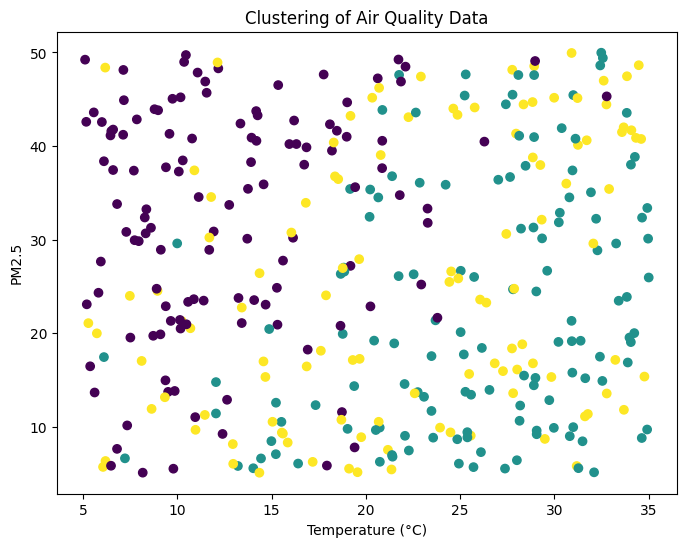

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(df['temperature'], df['pm25'], c=df['cluster'], cmap='viridis')
plt.title('Clustering of Air Quality Data')
plt.xlabel('Temperature (°C)')
plt.ylabel('PM2.5')
plt.show()
